# Which country has produced the most successful tennis players?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

event_dataframe = pd.DataFrame()
for file in os.listdir("raw/event_parquet"):
    single_stats = pd.read_parquet("raw/event_parquet/" + file)
    event_dataframe = pd.concat([event_dataframe, single_stats], axis= 'rows', ignore_index=True)


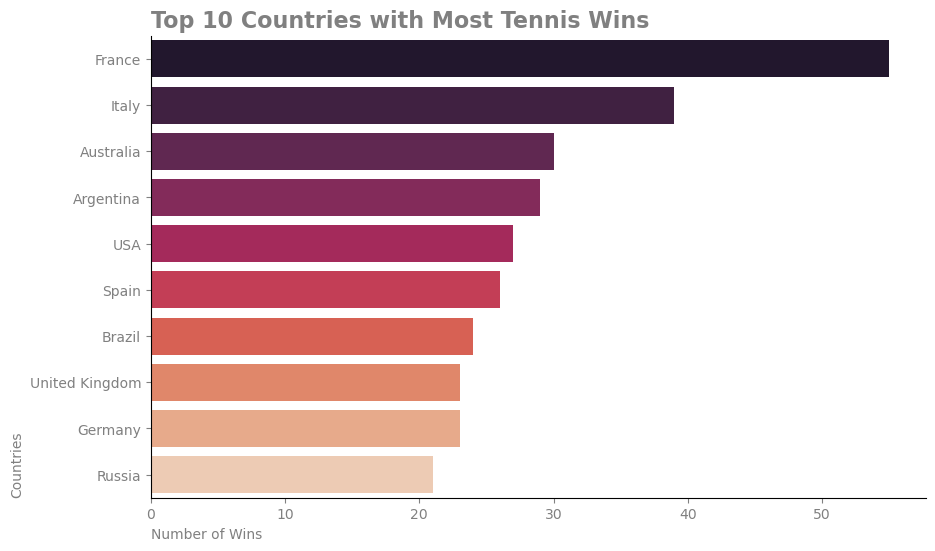

In [2]:
# فیلتر کردن مسابقات برنده شده توسط تیم خانه (برنده = 1)
home_wins = event_dataframe[event_dataframe['winner_code'] == 1]

# فیلتر کردن مسابقات برنده شده توسط تیم میهمان (برنده = 2)
away_wins = event_dataframe[event_dataframe['winner_code'] == 2]

# استخراج بازیکنانی که در تیم خانه برنده شده‌اند به همراه کشورشان
home_winners = home_wins.merge(home_team_dataframe[['match_id', 'player_id', 'country']], on='match_id', how='left')

# استخراج بازیکنانی که در تیم میهمان برنده شده‌اند به همراه کشورشان
away_winners = away_wins.merge(away_team_dataframe[['match_id', 'player_id', 'country']], on='match_id', how='left')

# ادغام لیست برندگان تیم خانه و تیم میهمان
all_winners = pd.concat([home_winners, away_winners])

# شمارش تعداد بردهای هر کشور
country_win_counts = all_winners['country'].value_counts()

# انتخاب 10 کشور برتر
top_countries = country_win_counts.head(10)



# تعریف palette اصلی
#original_palette = sns.color_palette('Greens_d')
# معکوس کردن palette
#reversed_palette = original_palette[:-1]
# رسم نمودار میله‌ای افقی برای 10 کشور برتر
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')

# عنوان و برچسب‌های نمودار
plt.title('Top 10 Countries with Most Tennis Wins', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Number of Wins', fontsize=10, color='gray', loc = 'left')
plt.ylabel('Countries', fontsize=10, color='gray', loc='bottom')

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# نمایش نمودار
plt.show()


In [3]:
top_countries.

country
France            55
Italy             39
Australia         30
Argentina         29
USA               27
Spain             26
Brazil            24
United Kingdom    23
Germany           23
Russia            21
Name: count, dtype: int64

In [5]:
country_win_counts.tail(20)


country
Jordan                2
Norway                2
India                 2
New Zealand           2
Israel                2
Sweden                2
Morocco               2
Thailand              1
Chile                 1
Ivory Coast           1
Nigeria               1
Peru                  1
Ireland               1
Lithuania             1
Dominican Republic    1
Moldova               1
Jamaica               1
Greece                1
Zimbabwe              1
Belgium               1
Name: count, dtype: int64